In [2]:
import pandas as pd
import numpy as np
import os
import pandas_datareader.data as web

import datetime
import matplotlib.pyplot as plt

import yfinance as yf



In [3]:
#复权个股日线
start = datetime.datetime(2020,1,1)
end   = datetime.datetime(2021,1,30)

tc="300015.SZ"

data = yf.download(tc, start, end) #利用 yfinance的python yahoo 库下载历史数据
#--------------------------------------获取复权收盘价------------------------------------------------------------
data = data.rename(columns={ 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'preclose', 'Adj Close': 'close', 'Volume': 'volume'})
#data = data[[ 'open', 'high', 'low', 'preclose', 'close', 'volume']]
#data.tail() # check OK or not

data['date'] = pd.to_datetime(data.index,format='%Y%m%d')
data.set_index('date', inplace=True)

#data = data[::-1].reset_index(drop=True)
#data = data.tail(200)

print(data)

 

[*********************100%***********************]  1 of 1 completed
                 open       high        low   preclose      close    volume
date                                                                       
2020-01-02  23.648046  23.648046  23.137829  23.434467  23.322918  35471884
2020-01-03  23.493795  23.636183  23.209023  23.369207  23.257969  33358398
2020-01-06  23.309879  23.309879  22.615744  22.864922  22.756083  45758845
2020-01-07  22.882719  23.292082  22.841190  23.250551  23.139877  35537142
2020-01-08  23.155626  23.588718  23.025106  23.025106  22.915504  29728209
...               ...        ...        ...        ...        ...       ...
2021-01-25  61.793427  64.523689  61.762577  63.058296  62.949703  41659782
2021-01-26  62.479851  63.706154  61.554337  61.616039  61.509930  34204375
2021-01-27  61.747150  64.400291  60.867916  63.528767  63.419365  36523457
2021-01-28  62.148209  62.981171  60.682812  60.860203  60.755394  32802371
2021-01-29  61.8551

In [4]:
def ssa(series, windowLen , pcn  ):
    seriesLen = len(series)
    K = seriesLen - windowLen + 1
    X = np.zeros((windowLen, K))
    for i in range(K):
        X[:, i] = series[i:i + windowLen]
    
    U, sigma, VT = np.linalg.svd(X, full_matrices=False)

    for i in range(VT.shape[0]):
        VT[i, :] *= sigma[i]
    A = VT

    rec = np.zeros((windowLen, seriesLen))
    for i in range(windowLen):
        for j in range(windowLen-1):
            for m in range(j+1):
                rec[i, j] += A[i, j-m] * U[m, i]
            rec[i, j] /= (j+1)
        for j in range(windowLen-1, seriesLen - windowLen + 1):
            for m in range(windowLen):
                rec[i, j] += A[i, j-m] * U[m, i]
            rec[i, j] /= windowLen
        for j in range(seriesLen - windowLen + 1, seriesLen):
            for m in range(j-seriesLen+windowLen, windowLen):
                rec[i, j] += A[i, j - m] * U[m, i]
            rec[i, j] /= (seriesLen - j)
    
    result = np.sum(rec[:pcn], axis=0)
    return result[-1]
    #return result


<AxesSubplot:title={'center':'股票代码:300015.SZ'}, xlabel='date'>

c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


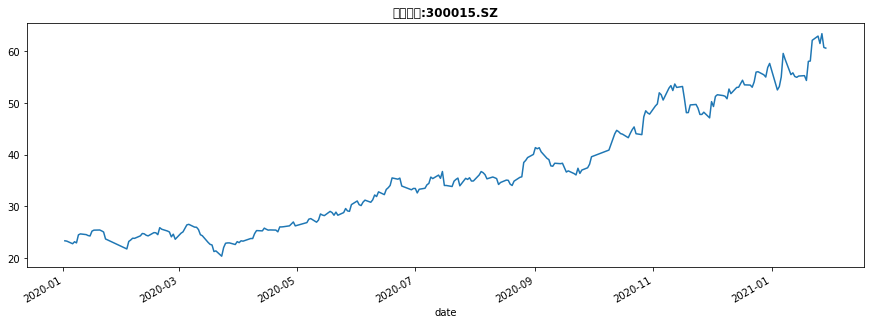

In [5]:

data['returns'] = data["close"].pct_change().fillna(0)


plt.figure(figsize=(15, 5))
plt.title("股票代码:"+str(tc), weight='bold')
data['close'].plot()



Text(0.5, 1.0, '股票代码:300015.SZ')

c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


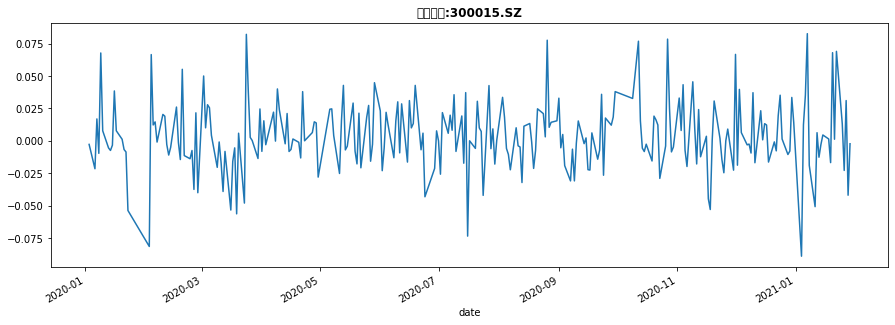

In [6]:
plt.figure(figsize=(15, 5))
data["close"].pct_change().plot()
plt.title("股票代码:"+str(tc), weight='bold')

<AxesSubplot:xlabel='date'>

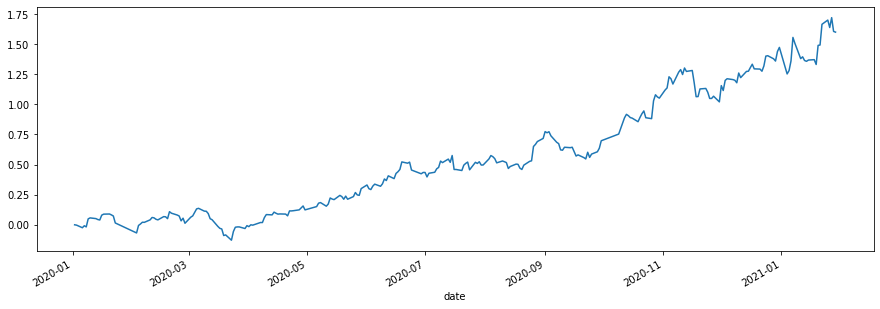

In [7]:
plt.figure(figsize=(15, 5))

data['rets_add_one'] = data['returns'] + 1
data['cumulative_rets'] = data['rets_add_one'].cumprod()-1
data['cumulative_rets'].plot()

#plt.title("股票代码:"+str(tc), weight='bold')

#print('基准收益：',np.array(data['cumulative_rets'])[-1])

Text(0.5, 1.0, '股票代码:300015.SZ')

c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


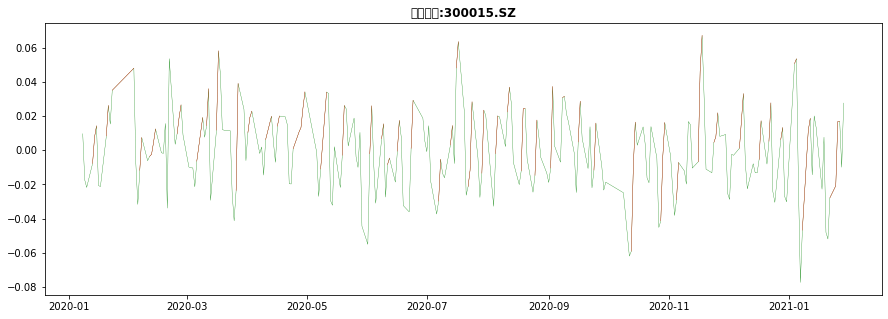

In [8]:
pcn = 1

wl = 2

data['hc'] = (data['high']-data['close'])/data['close']
data['lc'] = (data['close']-data['low'])/data['close']

#--------------------------------二次SSA-------------------------------------------------
data['hc_ssa1'] = data['hc'].rolling(2*wl - 1).apply(ssa,args = (wl,pcn),raw = True)
data['hc_ssa2'] = data['hc_ssa1'].rolling(2*wl - 1).apply(ssa,args = (wl,pcn),raw = True)

data['lc_ssa1'] = data['lc'].rolling(2*wl - 1).apply(ssa,args = (wl,pcn),raw = True)
data['lc_ssa2'] = data['lc_ssa1'].rolling(2*wl - 1).apply(ssa,args = (wl,pcn),raw = True)

data['hlp_ssa2'] = data['hc_ssa2'] - data['lc_ssa2']
#---------------------------------二次SSA导数-------------------------------------------------
#DataFrame.diff(periods=1, axis=0) ; periods：移动的幅度，int类型，默认值为1;
# axis：移动的方向，{0 or ‘index’, 1 or ‘columns’}，
# 如果为0或者’index’，则上下移动，如果为1或者’columns’，则左右移动。

#print (np.array(data['hlp_ssa2']))

data['dhl'] =  (data['hlp_ssa2'] - data['hlp_ssa2'].shift(1))

#---------------------------------回测收益-------------------------------------------------
data['hlp_attack'] = np.select([data['dhl'] > 0],[1],default = 0)#获取“单SSA >0策略”的时序的触发信号
data['hlp_ssa_g'] = np.select([data['dhl'] > 0],[data['hlp_ssa2']],default = np.nan)

plt.figure(figsize=(15, 5))
#plt.plot(data['hc_ssa2'], color="green", linewidth=0.3, linestyle="-")
#plt.plot(data['dhc_ssa_g'], color = "red",  linewidth=0.3, linestyle="-")

#plt.plot(data['lc_ssa2'], color="blue", linewidth=0.3, linestyle="-")
#plt.plot(data['dlc_ssa_g'], color = "MAGENTA",  linewidth=0.3, linestyle="-")

plt.plot(data['hlp_ssa2'], color="green", linewidth=0.3, linestyle="-")
plt.plot(data['hlp_ssa_g'], color = "red",  linewidth=0.3, linestyle="-")

plt.title("股票代码:"+str(tc), weight='bold')



c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31080 (\N{CJK UNIFIED IDEOGRAPH-7968}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yuany\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


基准收益： 1.5990232521851997
策略收益： 0.47505202639471533


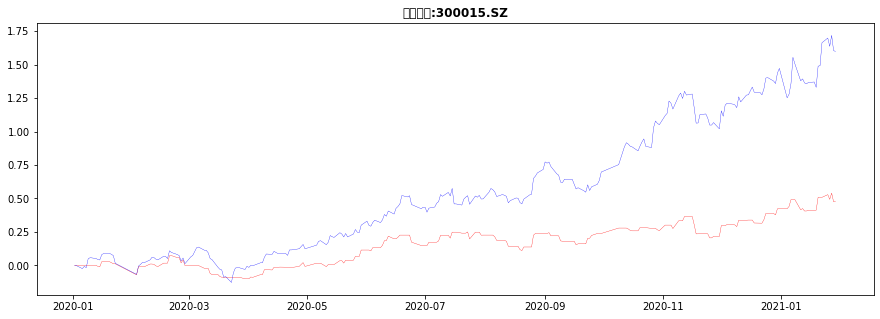

In [9]:

data['buy'] = data['hlp_attack'].shift(1) #下移一行买入信号

data['prc'] = np.select([data['buy'] == 1],[data['close']],default = np.nan)

data['profit'] = np.select([data['buy'] == 1],[data['returns']],default = 0) #计算策略每日收益

data['profit'] = data['profit'].fillna(0)+1
#print(np.array(data['profit']))

data['prod_profit'] = data['profit'].cumprod() -1 #计算策略每日收益累乘

plt.figure(figsize=(15, 5))
#data['prod_profit'].plot()

plt.plot(data['prod_profit'], color="red", linewidth=0.3, linestyle="-")
plt.plot(data['cumulative_rets'], color = "blue",  linewidth=0.3, linestyle="-")


plt.title("股票代码:"+str(tc), weight='bold')

print('基准收益：',np.array(data['cumulative_rets'])[-1])
print('策略收益：',np.array(data['prod_profit'])[-1])

Text(0.5, 1.0, '股票代码:300015.SZ')

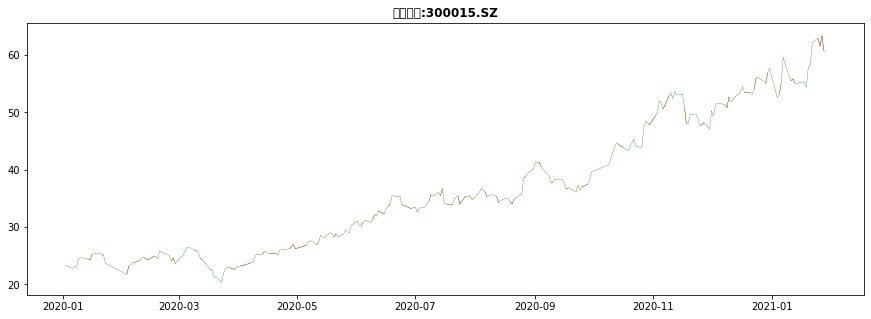

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(data['close'], color="green", linewidth=0.3, linestyle="-")
plt.plot(data['prc'], color = "red",  linewidth=0.3, linestyle="-")
plt.title("股票代码:"+str(tc), weight='bold')